Data augmentation is a technique commonly used in training Convolutional Neural Networks (CNNs) to artificially increase the size of the training dataset. It involves applying various transformations to the existing images, creating new training examples that are variations of the original images. This helps the model generalize better to different conditions and improve its robustness. Here are some common data augmentation techniques used in CNNs:

1. **Rotation:**
   - Randomly rotate the image by a certain angle (e.g., between 0 and 360 degrees).

2. **Horizontal and Vertical Flipping:**
   - Flip the image horizontally and/or vertically.

3. **Zooming:**
   - Randomly zoom into the image. This involves cropping and resizing the image.

4. **Width and Height Shifts:**
   - Shift the width and height of the image by a small fraction.

5. **Brightness Adjustment:**
   - Randomly adjust the brightness of the image.

6. **Contrast Adjustment:**
   - Randomly adjust the contrast of the image.

7. **Shearing:**
   - Apply a shear transformation to the image.

8. **Random Crop:**
   - Randomly crop a portion of the image.

9. **Color Jittering:**
   - Randomly change the color values of the pixels.

By applying these transformations, the model sees variations of the training images during each epoch, making it more robust to different conditions. Data augmentation is particularly useful when the training dataset is limited, as it effectively increases the diversity of the available examples. It helps prevent overfitting and improves the model's ability to generalize to unseen data.

In practice, data augmentation is often implemented using data augmentation libraries or functions provided by deep learning frameworks like TensorFlow or PyTorch. These libraries allow you to easily apply a combination of transformations to the images in real-time during the training process.

# Flower classification using CNN,

pahle bina argumentation use kiye, data uoverfit karayenge, fir argumentation se is problem ko solve krenge

In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Load flowers dataset

In [2]:

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"


In [3]:
data_dir = tf.keras.utils.get_file('flower_photo',origin=dataset_url,cache_dir='.',untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it


228813984/228813984 [==============================] - 11s 0us/step


In [4]:
data_dir # . = current dirctory

'./datasets/flower_photo'

In [18]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir
# data_dir = '/content/datasets/flower_photos/'
# data_dir

PosixPath('/content/datasets/flower_photos')

In jupyter : WindowsPath('datasets/flower_photos')

This code is using the `pathlib` module in Python to create a `Path` object from a given directory path represented by the variable `data_dir`. The `pathlib` module provides an object-oriented interface for working with file system paths.

Here's a breakdown of the code:

1. `pathlib.Path(data_dir)`: This creates a `Path` object by instantiating the `Path` class with the directory path specified by the variable `data_dir`.

2. `data_dir`: Presumably, `data_dir` is a variable that contains the path to a directory. The `Path` object allows you to work with this path in a more versatile and object-oriented manner.

By using `pathlib.Path`, you can perform various operations on the path, such as joining paths, navigating directories, and accessing components of the path (e.g., parent directory, file name). This can be more convenient and readable than using string manipulation functions when dealing with file paths.

In [19]:
print("All images with extention .jpg")
list(data_dir.glob('*/*.jpg'))

All images with extention .jpg


[PosixPath('/content/datasets/flower_photos/tulips/12024561754_ce9667e4dc_n.jpg'),
 PosixPath('/content/datasets/flower_photos/tulips/467702445_b8676f60fb_n.jpg'),
 PosixPath('/content/datasets/flower_photos/tulips/13529687904_3d60abb479_n.jpg'),
 PosixPath('/content/datasets/flower_photos/tulips/15647243236_2778501cf5_n.jpg'),
 PosixPath('/content/datasets/flower_photos/tulips/16862351376_f0fcc6fc91_n.jpg'),
 PosixPath('/content/datasets/flower_photos/tulips/8695372372_302135aeb2.jpg'),
 PosixPath('/content/datasets/flower_photos/tulips/4263272885_1a49ea5209.jpg'),
 PosixPath('/content/datasets/flower_photos/tulips/7069622551_348d41c327_n.jpg'),
 PosixPath('/content/datasets/flower_photos/tulips/2294116183_a30d2aa2c1_m.jpg'),
 PosixPath('/content/datasets/flower_photos/tulips/13910131718_731353d84c_n.jpg'),
 PosixPath('/content/datasets/flower_photos/tulips/14266093711_66d18a1e44_n.jpg'),
 PosixPath('/content/datasets/flower_photos/tulips/16680927427_07ca6e4552_n.jpg'),
 PosixPath('/c

In [20]:
len(list(data_dir.glob('*/*.jpg')))

3670

In [21]:
len(list(data_dir.glob('*/*'))) # images of all the extensions => all are jpg only as count = jpg count

3670

In [22]:
# count only roses image
roses = list(data_dir.glob('roses/*'))
len(roses)

641

In [23]:
roses[0:5]

[PosixPath('/content/datasets/flower_photos/roses/14019883858_e5d2a0ec10_n.jpg'),
 PosixPath('/content/datasets/flower_photos/roses/512578026_f6e6f2ad26.jpg'),
 PosixPath('/content/datasets/flower_photos/roses/5182167964_9d1a0be0b8_n.jpg'),
 PosixPath('/content/datasets/flower_photos/roses/4363734507_5cc4ed6e01.jpg'),
 PosixPath('/content/datasets/flower_photos/roses/5892908233_6756199a43.jpg')]

In [24]:
# Showing some images using PIL Library

In [25]:
str(roses[0])

'/content/datasets/flower_photos/roses/14019883858_e5d2a0ec10_n.jpg'

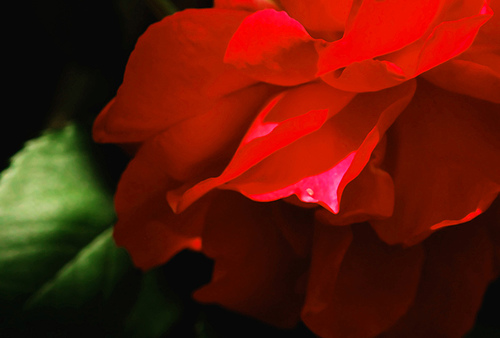

In [26]:
PIL.Image.open(str(roses[1])) # roses list me all roses fileNames with their paths are stored

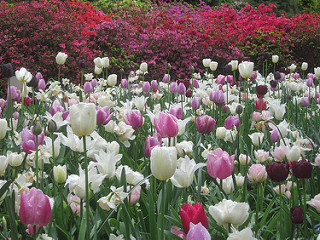

In [27]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [28]:
# dictioanary of flowers with their paths

flowers_images_dict = {
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*'))
}

In [29]:
flowers_images_dict['roses']

[PosixPath('/content/datasets/flower_photos/roses/14019883858_e5d2a0ec10_n.jpg'),
 PosixPath('/content/datasets/flower_photos/roses/512578026_f6e6f2ad26.jpg'),
 PosixPath('/content/datasets/flower_photos/roses/5182167964_9d1a0be0b8_n.jpg'),
 PosixPath('/content/datasets/flower_photos/roses/4363734507_5cc4ed6e01.jpg'),
 PosixPath('/content/datasets/flower_photos/roses/5892908233_6756199a43.jpg'),
 PosixPath('/content/datasets/flower_photos/roses/8462246855_1bdfee7478.jpg'),
 PosixPath('/content/datasets/flower_photos/roses/3871586333_5a708d5cf4_n.jpg'),
 PosixPath('/content/datasets/flower_photos/roses/4609168052_3d4e1d3804_n.jpg'),
 PosixPath('/content/datasets/flower_photos/roses/15184419268_7230e9728e.jpg'),
 PosixPath('/content/datasets/flower_photos/roses/8524505868_236f4c94b5.jpg'),
 PosixPath('/content/datasets/flower_photos/roses/14172324538_2147808483_n.jpg'),
 PosixPath('/content/datasets/flower_photos/roses/5060536705_b370a5c543_n.jpg'),
 PosixPath('/content/datasets/flower_p

In [30]:
# labels dictionary

flowers_labels_dict = {
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4
}

In [31]:
flowers_images_dict['roses'][0] # since roses key ke corresponding value is itself a dictionary. Hence you need to give index as well ki kon sa element list ka dekhna hai

PosixPath('/content/datasets/flower_photos/roses/14019883858_e5d2a0ec10_n.jpg')

In [32]:
cv2.imread(str(flowers_images_dict['roses'][0])) # image file path do, numpy array milega
# cv2 does not take windos path, need to convert in str , in case you are using pathlib

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [33]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape # 3 channels, each with 228*320 pixels

(231, 320, 3)

All images to same dimension me kr lo

In [34]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [35]:
X, Y =[],[]

for flower_name, images in flowers_images_dict.items(): # fist variable will automatically be key, and 2nd will automatically become value of the key, in eaach iteration of for loop, one-key and corresponding value will be traversed
  print(flower_name)
  print(len(images))

roses
641
daisy
633
dandelion
898
sunflowers
699
tulips
799


In [36]:
X, Y =[],[]

for flower_name, images in flowers_images_dict.items(): # fist variable will automatically be key, and 2nd will automatically become value of the key, in eaach iteration of for loop, one-key and corresponding value will be traversed
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img,(180,180))
    X.append(resized_img)
    Y.append(flowers_labels_dict[flower_name])

All images jo ki different deiffernt directories me thin and unke corresponding labels ko hmne, kitna sara jugad laga ke single X and single Y me kr liya.

Ye upar ka pathlib, etc sb isi ke liye tha. Direct copy paste na krte hue, images ko unke sthan se bina hilaye, X and Y me dalna

In [37]:
X[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [38]:
type(X)

list

In [39]:
type(Y)

list

So X and Y are lists, as for loop lga kr hmne appen list X, Y me hi kiya tha.

In [40]:
# so list to array
X = np.array(X)
Y = np.array(Y)

In [41]:
type(X)

numpy.ndarray

In [42]:
type(Y)

numpy.ndarray

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,random_state=0)

In [44]:
len(x_train)

2752

In [45]:
type(x_train)

numpy.ndarray

ohh I see, numpy array ki bhi size len() function se nikal ja skti hai

In [46]:
len(x_test)

918

In [47]:
918/(918+2752)

0.2501362397820163

Oh so default test_size = 0.25 i.e.25 %

In [48]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [49]:
num_classes =5

cnn_Model = Sequential([
    # firstly multiple convolutional and maxpooling layers
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),

    # flatten layers and then dense layers. SDence layers are part of ann, jo 1D array input chahti hain
    layers.Flatten(),
    layers.Dense(128,activation='relu'), # one dense layer
    layers.Dense(num_classes) # output layer
])

In [50]:
cnn_Model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [51]:
cnn_Model.fit( x_train_scaled,y_train,epochs=10)

Epoch 1/10
86/86 [==============================] - 13s 20ms/step - loss: 1.4019 - accuracy: 0.4128
Epoch 2/10
86/86 [==============================] - 2s 20ms/step - loss: 1.0059 - accuracy: 0.6025
Epoch 3/10
86/86 [==============================] - 2s 22ms/step - loss: 0.8466 - accuracy: 0.6679
Epoch 4/10
86/86 [==============================] - 2s 22ms/step - loss: 0.6727 - accuracy: 0.7471
Epoch 5/10
86/86 [==============================] - 2s 20ms/step - loss: 0.4553 - accuracy: 0.8398
Epoch 6/10
86/86 [==============================] - 2s 25ms/step - loss: 0.2889 - accuracy: 0.9019
Epoch 7/10
86/86 [==============================] - 2s 25ms/step - loss: 0.1700 - accuracy: 0.9422
Epoch 8/10
86/86 [==============================] - 2s 26ms/step - loss: 0.1129 - accuracy: 0.9691
Epoch 9/10
86/86 [==============================] - 2s 24ms/step - loss: 0.0564 - accuracy: 0.9840
Epoch 10/10
86/86 [==============================] - 2s 25ms/step - loss: 0.0335 - accuracy: 0.9938


so 99.38 % training accuracy even for 10 epochs

In [53]:
cnn_Model.evaluate(x_test_scaled,y_test)

29/29 [==============================] - 1s 18ms/step - loss: 1.7697 - accuracy: 0.6416


[1.7697428464889526, 0.64161217212677]

ohohohohh just 64 % accuracy on test data =  perfect example of overfitting

Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (66.99%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting

In [56]:
predictions = cnn_Model.predict(x_test_scaled)
predictions

29/29 [==============================] - 0s 10ms/step


array([[  6.9746976 ,  10.565387  ,   4.5184774 , -12.823523  ,
         -3.0912108 ],
       [ 10.3083515 ,   5.5053496 ,  -4.4666867 ,  -9.257673  ,
          3.0149214 ],
       [  0.7178669 ,  -1.4228565 ,  11.907621  , -11.259062  ,
         -2.6272864 ],
       ...,
       [  0.36410177,  -1.5445578 ,   2.6227016 ,  -3.069802  ,
          2.4216316 ],
       [  2.3000243 ,  -1.7644991 ,   0.9924138 ,  -7.623317  ,
          2.436126  ],
       [-10.133831  ,  -1.6505089 ,   0.43836838,  10.337856  ,
          2.352738  ]], dtype=float32)

In [57]:
# so values ko probabilities me badlne ke liye softmax iis given by tensorflow
# converting numpy array to set of probability scores

score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([2.6777450e-02, 9.7092503e-01, 2.2963935e-03, 6.7532348e-11,
       1.1381537e-06], dtype=float32)>

In [58]:
np.argmax(score)

1

index 1

In [59]:
y_test[0]

1

Data Argumentation to handle overfitting

In [60]:
data_argumentation = keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
])

In [61]:
data_argumentation

Your provided code is using the `RandomZoom` layer from the `layers.experimental.preprocessing` module in TensorFlow/Keras. This layer is a part of data augmentation techniques used in deep learning, particularly for image data.

In the given code:

```python
data_argumentation = keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
])
```

- `keras.Sequential` creates a sequential model.
- `layers.experimental.preprocessing.RandomZoom(0.3)` adds a layer that applies random zoom to the input data. The `0.3` parameter is the maximum zoom factor. It means that the layer will randomly zoom in the input data up to a factor of 0.3.

Data augmentation, including operations like random zoom, helps to artificially increase the diversity of your training dataset, which can lead to a more robust model. This is especially useful in computer vision tasks, such as image classification, to expose the model to different variations of the input data during training.

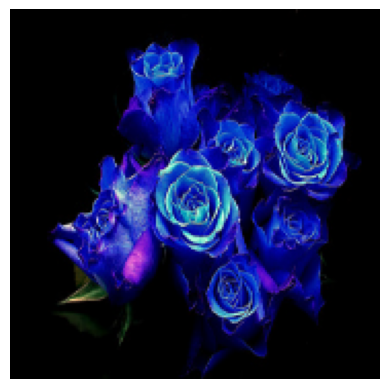

In [62]:
plt.axis('off')
plt.imshow(X[0])

In [63]:
# applying data argumentation
data_argumentation(X)[0] # data_argumentation expects a 2D array

<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)>

it gives tensor array. Transformed image

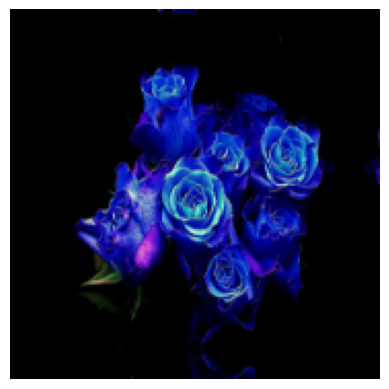

In [68]:
plt.axis('off')
plt.imshow(data_argumentation(X)[0].numpy().astype('uint8'))

I have applied random zoom

so it can zoom in and zoom out both, each time run, 0.3 se 0.6, 0.9 etc krke dekh lo. zoom in and out randomly hoga

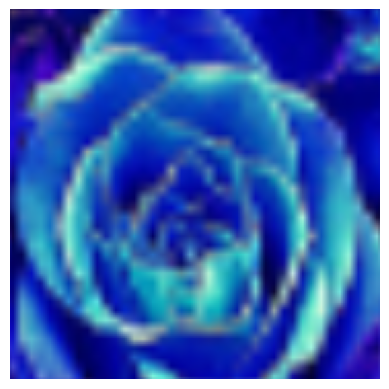

In [74]:
data_argumentation = keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.9),
])

plt.axis('off')
plt.imshow(data_argumentation(X)[0].numpy().astype('uint8'))

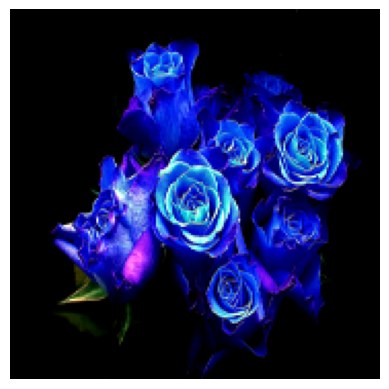

In [79]:
# contrast change : random contrast

data_argumentation = keras.Sequential([
    layers.experimental.preprocessing.RandomContrast(0.3),
])

plt.axis('off')
plt.imshow(data_argumentation(X)[0].numpy().astype('uint8'))

It's bright now. Same piece of code bar bar run krne pr different different result mil rhe. Each random

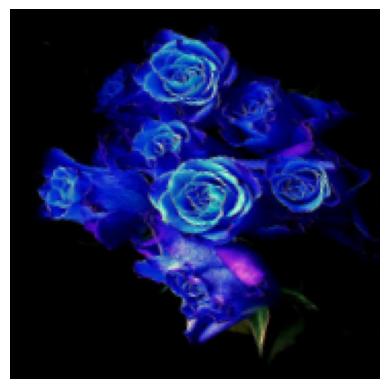

In [82]:
# Rotation change : random rotation

data_argumentation = keras.Sequential([
    layers.experimental.preprocessing.RandomRotation(0.3),
])

plt.axis('off')
plt.imshow(data_argumentation(X)[0].numpy().astype('uint8'))

So we can use these 3 functionalities of argumentation to produce more samples

When you supply rotated, scaled, contrast images in your training, it will generalize well. It will make model more robust(majbut, tagda)

In [84]:
img_height = 180
img_width = 180
data_argumentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape = (img_height,img_width,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
])

In [85]:
num_classes =5

cnn_Model = Sequential([
    # first layer : data argumentation : to produce more layers
    data_argumentation,

    # then multiple convolutional and maxpooling layers
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),

    layers.Dropout(0.2), # 20 % neurans drop at randon at each pass
    # flatten layers and then dense layers. SDence layers are part of ann, jo 1D array input chahti hain
    layers.Flatten(),
    layers.Dense(128,activation='relu'), # one dense layer
    layers.Dense(num_classes) # output layer
])

In [86]:
cnn_Model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [87]:
cnn_Model.fit( x_train_scaled,y_train,epochs=10)

Epoch 1/10
86/86 [==============================] - 6s 28ms/step - loss: 1.3530 - accuracy: 0.4073
Epoch 2/10
86/86 [==============================] - 2s 29ms/step - loss: 1.0658 - accuracy: 0.5781
Epoch 3/10
86/86 [==============================] - 3s 30ms/step - loss: 0.9333 - accuracy: 0.6370
Epoch 4/10
86/86 [==============================] - 2s 27ms/step - loss: 0.8627 - accuracy: 0.6653
Epoch 5/10
86/86 [==============================] - 2s 27ms/step - loss: 0.8173 - accuracy: 0.6820
Epoch 6/10
86/86 [==============================] - 2s 28ms/step - loss: 0.7840 - accuracy: 0.7017
Epoch 7/10
86/86 [==============================] - 2s 27ms/step - loss: 0.7424 - accuracy: 0.7122
Epoch 8/10
86/86 [==============================] - 3s 29ms/step - loss: 0.6929 - accuracy: 0.7369
Epoch 9/10
86/86 [==============================] - 3s 29ms/step - loss: 0.6661 - accuracy: 0.7435
Epoch 10/10
86/86 [==============================] - 2s 27ms/step - loss: 0.6522 - accuracy: 0.7540


So training accuracy after 10 epochs : 75 %

In [88]:
cnn_Model.evaluate(x_test_scaled,y_test)

29/29 [==============================] - 0s 11ms/step - loss: 0.8948 - accuracy: 0.6754


[0.8947620987892151, 0.6753812432289124]

64 to 67 % , 3 % improvement in 10 epochs. with 30 epochs you will get 10 % improvement

Hence the usefullnesss of data argumentation = increases test accuracy, reduces model overfitting